This notebook tries to search for optimal fixed policies (e.g. constant mortality) that maximize the objective (i.e. expected net reward). Here I try [scikit-optimize](https://scikit-optimize.github.io/stable/index.html).

In [1]:
%pip install -e ..
# %pip install scikit-optimize

Obtaining file:///home/rstudio/rl4fisheries
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
  Using cached typing-3.7.4.3-py3-none-any.whl
  Building editable for rl4fisheries (pyproject.toml) ... done
  Created wheel for rl4fisheries: filename=rl4fisheries-1.0.0-0.editable-py3-none-any.whl size=2308 sha256=df1172f551bdc26310c562bf2af05b6167d549b2557a511f5e89afb29ae3da0d
  Stored in directory: /tmp/pip-ephem-wheel-cache-tw68yoi8/wheels/d3/ce/fe/d5af67bb4edf309f6a59d59140b2b78d5a336b2ad4b93a1fb4
Successfully built rl4fisheries
Note: you may need to restart the kernel to use updated packages.


# Using skopt

In [3]:
from skopt import gp_minimize, gbrt_minimize 
from skopt.plots import plot_objective

from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
from rl4fisheries import Asm, Asm2o, Msy, ConstEsc, CautionaryRule
import numpy as np

## MSY (Constant Mortality)

In [2]:
env = Asm()
def msy_fun(x):
    agent = Msy(mortality=x[0])
    mean, sd = evaluate_policy(agent, Monitor(env), n_eval_episodes=100)
    return -mean

In [3]:
%%time
msy_gp = gp_minimize(msy_fun, [(0.002, 0.25)], n_calls = 100, verbose=True, n_jobs=-1)
msy_gp.fun, msy_gp.x

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 1.1018
Function value obtained: -29.5673
Current minimum: -29.5673
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 1.1198
Function value obtained: -29.0363
Current minimum: -29.5673
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 1.0984
Function value obtained: -8.2585
Current minimum: -29.5673
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 1.0947
Function value obtained: -4.3467
Current minimum: -29.5673
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 1.0949
Function value obtained: -18.4655
Current minimum: -29.5673
Iteration No: 6 s

/opt/venv/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 461 ended. Search finished for the next optimal point.
Time taken: 13.5517
Function value obtained: -47.8013
Current minimum: -62.0848
Iteration No: 462 started. Searching for the next optimal point.
Iteration No: 462 ended. Search finished for the next optimal point.
Time taken: 13.6241
Function value obtained: -45.2473
Current minimum: -62.0848
Iteration No: 463 started. Searching for the next optimal point.
Iteration No: 463 ended. Search finished for the next optimal point.
Time taken: 13.8598
Function value obtained: -41.5950
Current minimum: -62.0848
Iteration No: 464 started. Searching for the next optimal point.
Iteration No: 464 ended. Search finished for the next optimal point.
Time taken: 13.4720
Function value obtained: -55.2877
Current minimum: -62.0848
Iteration No: 465 started. Searching for the next optimal point.
Iteration No: 465 ended. Search finished for the next optimal point.
Time taken: 13.9496
Function value obtained: -37.7770
Current minimum: -62.

/opt/venv/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 491 ended. Search finished for the next optimal point.
Time taken: 14.9142
Function value obtained: -41.1283
Current minimum: -62.0848
Iteration No: 492 started. Searching for the next optimal point.
Iteration No: 492 ended. Search finished for the next optimal point.
Time taken: 14.9688
Function value obtained: -47.3437
Current minimum: -62.0848
Iteration No: 493 started. Searching for the next optimal point.
Iteration No: 493 ended. Search finished for the next optimal point.
Time taken: 15.2509
Function value obtained: -38.7203
Current minimum: -62.0848
Iteration No: 494 started. Searching for the next optimal point.
Iteration No: 494 ended. Search finished for the next optimal point.
Time taken: 15.0143
Function value obtained: -42.6341
Current minimum: -62.0848
Iteration No: 495 started. Searching for the next optimal point.
Iteration No: 495 ended. Search finished for the next optimal point.
Time taken: 15.0975
Function value obtained: -41.0785
Current minimum: -62.

(-62.08484130000001, [0.058590822346937174])

In [ ]:
# -> (-62.08484130000001, [0.058590822346937174])

In [4]:
%%time
msy_gbrt = gbrt_minimize(msy_fun, [(0.02, 0.15)], n_calls = 100, verbose=True, n_jobs=-1)
msy_gbrt.fun, msy_gbrt.x

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 1.0914
Function value obtained: -29.0648
Current minimum: -29.0648
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 1.0919
Function value obtained: -43.3516
Current minimum: -43.3516
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 1.0924
Function value obtained: -43.5100
Current minimum: -43.5100
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 1.0973
Function value obtained: -46.0853
Current minimum: -46.0853
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 1.0984
Function value obtained: -42.9894
Current minimum: -46.0853
Iteration No: 6

/opt/venv/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 1.2440
Function value obtained: -39.6403
Current minimum: -57.1683
Iteration No: 44 started. Searching for the next optimal point.
Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 1.2345
Function value obtained: -21.5861
Current minimum: -57.1683
Iteration No: 45 started. Searching for the next optimal point.
Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 1.2316
Function value obtained: -42.6638
Current minimum: -57.1683
Iteration No: 46 started. Searching for the next optimal point.
Iteration No: 46 ended. Search finished for the next optimal point.
Time taken: 1.2640
Function value obtained: -21.5203
Current minimum: -57.1683
Iteration No: 47 started. Searching for the next optimal point.
Iteration No: 47 ended. Search finished for the next optimal point.
Time taken: 1.2433
Function value obtained: -41.4619
Current minimum: -57.1683
Iteration

(-57.168266599999995, [0.05811506272614242])

In [1]:
# -> (-57.168266599999995, [0.05811506272614242])

<Axes: xlabel='$X_{0}$', ylabel='Partial dependence'>

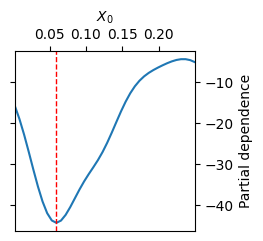

In [27]:
plot_objective(msy_gp)

## Const Escapement

In [5]:
def esc_fun(x):
    agent = Msy(mortality=x[0])
    mean, sd = evaluate_policy(agent, Monitor(env), n_eval_episodes=100)
    return -mean

In [6]:
%%time
esc_gp = gp_minimize(esc_fun, [(0.002, 0.25)], n_calls = 500, verbose=True, n_jobs=-1)
esc_gp.fun, esc_gp.x

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 1.1125
Function value obtained: -3.9773
Current minimum: -3.9773
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 1.1054
Function value obtained: -38.1530
Current minimum: -38.1530
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 1.1181
Function value obtained: -21.7307
Current minimum: -38.1530
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 1.1157
Function value obtained: -36.2086
Current minimum: -38.1530
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 1.1056
Function value obtained: -24.0937
Current minimum: -38.1530
Iteration No: 6 s

(-54.8142164, [0.05693229984265447])

In [7]:
%%time
esc_gbrt = gbrt_minimize(esc_fun, [(0.02, 0.15)], n_calls = 100, verbose=True, n_jobs=-1)
esc_gbrt.fun, esc_gbrt.x

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 1.0969
Function value obtained: -43.7686
Current minimum: -43.7686
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 1.0963
Function value obtained: -46.2158
Current minimum: -46.2158
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 1.0913
Function value obtained: -41.6384
Current minimum: -46.2158
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 1.0988
Function value obtained: -38.1748
Current minimum: -46.2158
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 1.0932
Function value obtained: -30.8152
Current minimum: -46.2158
Iteration No: 6

(-54.552704199999994, [0.05755569926168816])

<Axes: xlabel='$X_{0}$', ylabel='Partial dependence'>

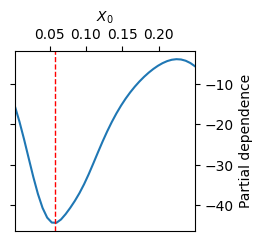

In [26]:
plot_objective(esc_gp)

## Precationary Rule (piecewise linear)

In [10]:
from skopt.space import Real
from skopt.utils import use_named_args

space  = [Real(0.00001, 1, name='radius'),
          Real(0.00001, np.pi/4.00001, name='theta'),
          Real(0, 0.2, name='y2')]

@use_named_args(space)
def g(**params):

    theta = params["theta"]
    radius = params["radius"]
    x1 = np.sin(theta) * radius
    x2 = np.cos(theta) * radius
    
    assert x1 <= x2, ("CautionaryRule error: x1 < x2, " + str(x1) + ", ", str(x2) )

    agent = CautionaryRule(x1 = x1, x2 =  x2, y2 = params["y2"])
    mean, sd = evaluate_policy(agent, Monitor(env), n_eval_episodes=100)
    return -mean        


In [11]:
%%time
g_gp = gp_minimize(g, space, n_calls = 300, verbose=True, n_jobs=-1)


Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 12.0631
Function value obtained: -11.1922
Current minimum: -11.1922
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 11.6792
Function value obtained: -7.5372
Current minimum: -11.1922
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 11.6676
Function value obtained: -43.8100
Current minimum: -43.8100
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 11.6998
Function value obtained: -14.2469
Current minimum: -43.8100
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 11.6204
Function value obtained: -8.4166
Current minimum: -43.8100
Iteration No

(-64.06042883, [0.041136645707627796, 0.7853961999069485, 0.12010362758045579])

In [ ]:
# -> (-64.06042883, [0.041136645707627796, 0.7853961999069485, 0.12010362758045579])

In [12]:
%%time
g_gbrt = gbrt_minimize(g, space, n_calls = 300, verbose=True, n_jobs=-1)


Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 11.6798
Function value obtained: -17.7134
Current minimum: -17.7134
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 11.6132
Function value obtained: -35.0209
Current minimum: -35.0209
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 11.4436
Function value obtained: -4.6572
Current minimum: -35.0209
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 11.6489
Function value obtained: -11.3697
Current minimum: -35.0209
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 11.9656
Function value obtained: -24.4783
Current minimum: -35.0209
Iteration N

(-64.49868469, [0.06184391109700299, 0.3296309210963565, 0.12990125226898555])

In [ ]:
# -> (-64.49868469, [0.06184391109700299, 0.3296309210963565, 0.12990125226898555])

In [14]:
g_gp.fun, g_gp.x, g_gbrt.fun, g_gbrt.x

(-64.06042883,
 [0.041136645707627796, 0.7853961999069485, 0.12010362758045579],
 -64.49868469,
 [0.06184391109700299, 0.3296309210963565, 0.12990125226898555])

In [22]:
res = g_gp

radius = res.x[0]
theta = res.x[1]
y2 = res.x[2]
x1 = np.sin(theta) * radius
x2 = np.cos(theta) * radius

agent = CautionaryRule(x1, x2, y2)
evaluate_policy(agent, Monitor(env), n_eval_episodes=100)


(61.346940599999996, 14.639097133690518)

array([[<Axes: xlabel='radius', ylabel='Partial dependence'>, <Axes: >,
        <Axes: >],
       [<Axes: ylabel='theta'>,
        <Axes: xlabel='theta', ylabel='Partial dependence'>, <Axes: >],
       [<Axes: xlabel='radius', ylabel='y2'>, <Axes: xlabel='theta'>,
        <Axes: xlabel='y2', ylabel='Partial dependence'>]], dtype=object)

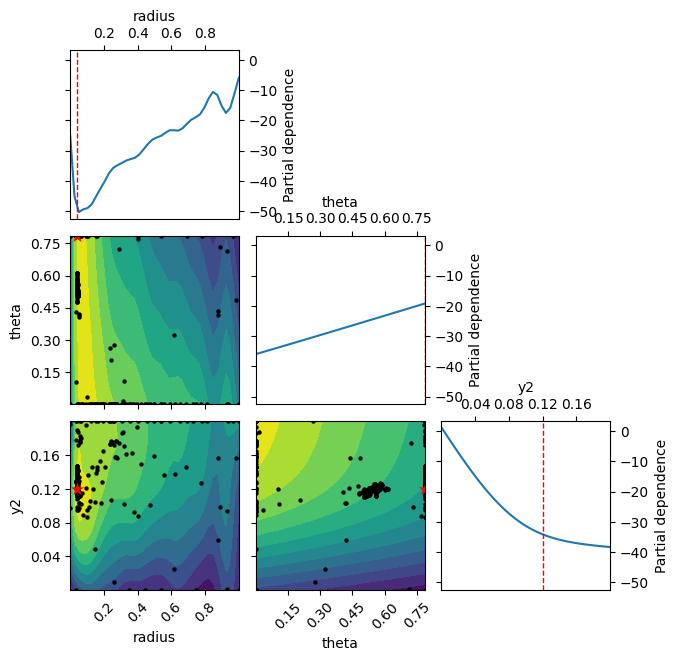

In [23]:
plot_objective(g_gp)

# Reward statistics

## Helper fns

In [12]:
import pandas as pd
import ray

def agent_ep_df(agent, agent_id, env):
    obs, _ =  env.reset()
    observs = []
    ep_rew = 0
    for t in range(800):
        action, info =  agent.predict(obs)
        observs.append([t, *(env.bound  * (obs+1))/2, *(action + 1)/2])
        obs, rew, term, trunc, info = env.step(action)
        ep_rew += rew
        if term or trunc:
            break
    
    data = pd.DataFrame(observs, columns=['t', 'biomass', 'mean_wt', 'effort'])
    data['agent'] = agent_id + f": rew = {ep_rew:.2f}"
    return data

@ray.remote
def gen_ep_rew(manager, env):
    episode_reward = 0.0
    observation, _ = env.reset()
    for t in range(env.Tmax):
        action, _ = manager.predict(observation)
        observation, reward, terminated, done, info = env.step(action)
        episode_reward += reward
        if terminated or done:
            break
    return episode_reward

@ray.remote(num_gpus=2)
def gen_ep_rew_gpu(manager, env):
    episode_reward = 0.0
    observation, _ = env.reset()
    for t in range(env.Tmax):
        action, _ = manager.predict(observation)
        observation, reward, terminated, done, info = env.step(action)
        episode_reward += reward
        if terminated or done:
            break
    return episode_reward

def rew_stats(manager, env, N=100):
    return ray.get(
        [gen_ep_rew.remote(manager, env) for _ in range(N)]
    )

def rew_stats_gpu(manager, env, N=100):
    return ray.get(
        [gen_ep_rew_gpu.remote(manager, env) for _ in range(N)]
    )

## agents

### download RL models saved on hugging face

In [13]:
## download & upload saved model weights
from huggingface_hub import hf_hub_download, HfApi, login
api = HfApi()

In [6]:
login()

In [7]:
revision = "d21aac2cf7acd04485ae97c4194954cdba038ce2"
ppo_1obs = hf_hub_download(repo_id="boettiger-lab/rl4eco", filename="sb3/PPO-Asm-v0-1.zip", revision=revision)
ppo_2obs = hf_hub_download(repo_id="boettiger-lab/rl4eco", filename="sb3/PPO-Asm2o-v0-1.zip", revision=revision)

In [8]:
from rl4fisheries.utils.sb3 import load_sb3_agent

ppo_agent = load_sb3_agent(algo = "PPO", env = Asm(), weights = ppo_1obs)
ppo2o_agent = load_sb3_agent(algo = "PPO", env = Asm2o(), weights = ppo_2obs)

### Fixed policy agents

In [9]:
msy_agent = Msy(mortality = 0.05811506272614242)

In [10]:
radius, theta, y2 = [0.041136645707627796, 0.7853961999069485, 0.12010362758045579] 

x1 = radius * np.sin(theta)
x2 = radius * np.cos(theta)

cr_agent = CautionaryRule(x1=x1, x2=x2, y2=y2)

### Generate reward data

In [19]:
msy_rews = rew_stats(manager=msy_agent, env=Asm())

In [20]:
cr_rews = rew_stats(manager=cr_agent, env=Asm())

In [15]:
ppo_agent_ref = ray.put(ppo_agent)
ppo_rews = rew_stats_gpu(manager=ppo_agent_ref, env=Asm())

In [17]:
ppo2o_agent_ref = ray.put(ppo2o_agent)
ppo2o_rews = rew_stats_gpu(manager=ppo2o_agent_ref, env=Asm2o())

In [22]:
msy_df = pd.DataFrame({"strategy": "msy", "reward":msy_rews})
cr_df = pd.DataFrame({"strategy": "cr", "reward":cr_rews})
ppo_df = pd.DataFrame({"strategy": "ppo", "reward":ppo_rews})
ppo2o_df = pd.DataFrame({"strategy": "ppo_2obs", "reward":ppo2o_rews})

rew_df = pd.concat([msy_df, cr_df, ppo_df, ppo2o_df], ignore_index=True)

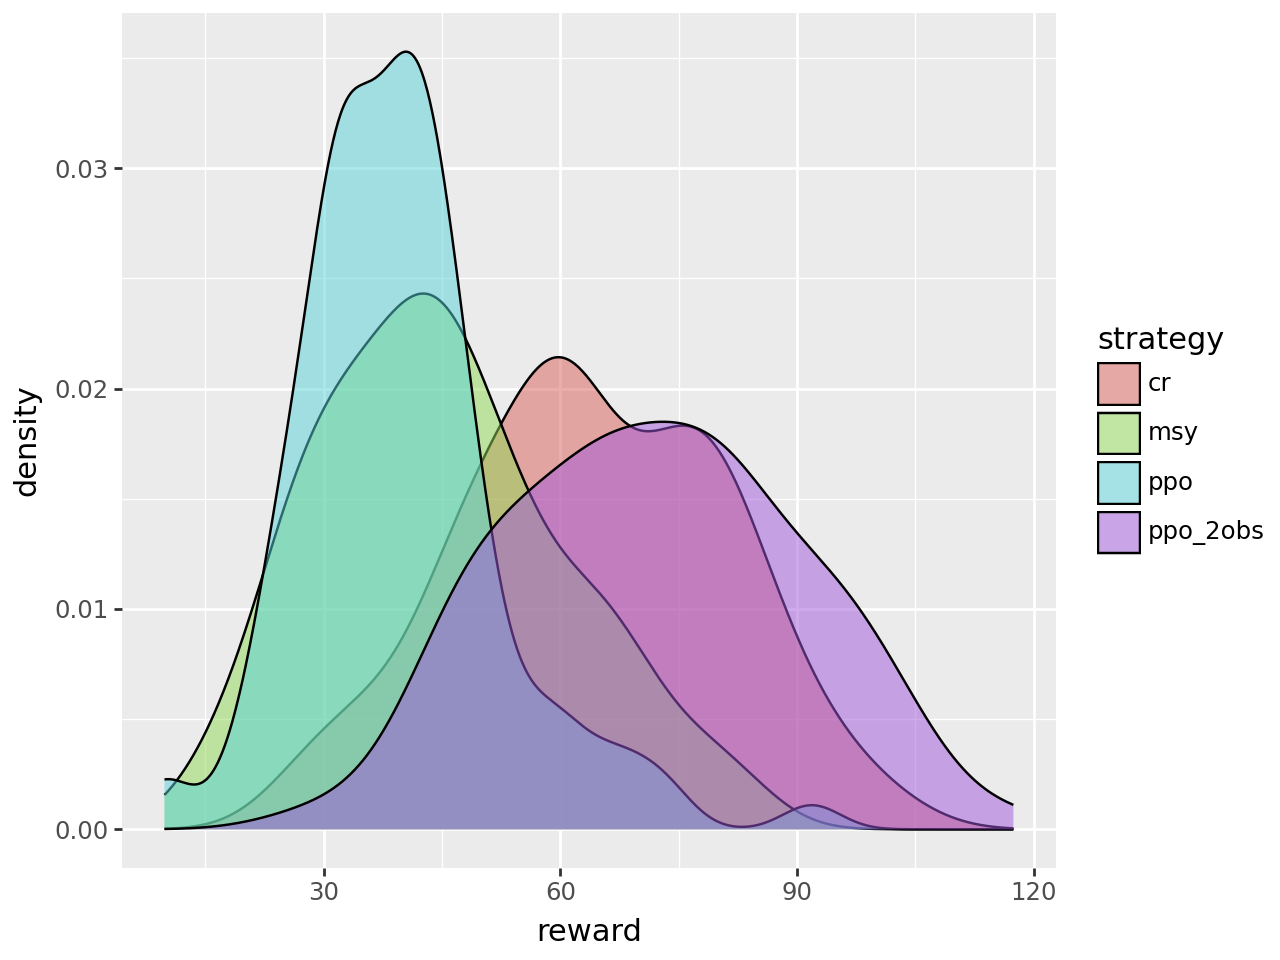

In [25]:
from plotnine import ggplot, aes, geom_density
(
    ggplot(rew_df, aes(x="reward", fill="strategy")) +#  geom_bar(stat="bin", binwidth=1, alpha=0.5) + 
    geom_density(alpha=0.5) 
)